# Power Transformer:

- Box-Cox transform.
- Yeo-Johnson.
-------------
**Box-Cox transform**

**Formula**
- ξ^λ = ξ^λ - 1 / λ ln(ξ)

where:

- ξ (xi) represents a variable
- λ (lambda) represents another variable
- ^ (caret) denotes exponentiation
- / (slash) represents division
- ln(ξ) represents the natural logarithm of ξ

- The exponent here isa variable called lambda that varies over the range -5 to 5 and in the process of searching we examine all values of lambda finally we choose the optimal value of ypur variable.
- Strickly applicable only numbers that are greater then zero and (-ve) no also not allowed.
----------------
**Yeo-Johnson**

**Formula**
ξ^λ = {[(ξ+1)^λ - 1]λ
       ln(ξ)+1 
       -[(-ξ+1)^(2λ) - 1]/(2-λ)
       -ln(-ξ+1)}

where: 

- ξ (xi) represents a variable
- λ (lambda) represents another variable
- ^ (caret) denotes exponentiation
- { and } (curly braces) represent a set or collection of values
- [ and ] (square brackets) enclose expressions that are evaluated first
- / (slash) represents division
- ln(ξ) represents the natural logarithm of ξ

- The tranformation is some what of an adjustment to the Box Cox transformation by which we can apply to negative numbers.

## Import libraries:

In [167]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PowerTransformer

## Load Dataset:

In [168]:
df=pd.read_csv('../Data/data_science_job.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [169]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


,enrollee_id,city_development_index,experience,training_hours,target
count,19158.000000,18679.000000,19093.000000,18392.000000,19158.000000
mean,16875.358179,0.828951,9.928036,65.185787,0.249348
std,9616.292592,0.123334,6.505268,59.885626,0.432647
min,1.000000,0.448000,0.000000,1.000000,0.000000
25%,8554.250000,0.740000,4.000000,23.000000,0.000000
50%,16982.500000,0.903000,9.000000,47.000000,0.000000
75%,25169.750000,0.920000,16.000000,88.000000,0.000000
max,33380.000000,0.949000,20.000000,336.000000,1.000000


In [170]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [171]:
df=df[['enrollee_id','city_development_index','experience','training_hours','target']]

In [172]:
df.describe()

,enrollee_id,city_development_index,experience,training_hours,target
count,19158.000000,18679.000000,19093.000000,18392.000000,19158.000000
mean,16875.358179,0.828951,9.928036,65.185787,0.249348
std,9616.292592,0.123334,6.505268,59.885626,0.432647
min,1.000000,0.448000,0.000000,1.000000,0.000000
25%,8554.250000,0.740000,4.000000,23.000000,0.000000
50%,16982.500000,0.903000,9.000000,47.000000,0.000000
75%,25169.750000,0.920000,16.000000,88.000000,0.000000
max,33380.000000,0.949000,20.000000,336.000000,1.000000


In [173]:
df.isnull().sum()

enrollee_id                 0
city_development_index    479
experience                 65
training_hours            766
target                      0
dtype: int64

In [174]:
df.fillna(df.median(), inplace=True)

In [175]:
df.isnull().sum()

enrollee_id               0
city_development_index    0
experience                0
training_hours            0
target                    0
dtype: int64

## Train test split:

In [176]:
X=df.iloc[:,1:4]
y=df.iloc[:,-1]

In [177]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [178]:
X_train

,city_development_index,experience,training_hours
13330,0.910,2.0,16.0
18074,0.897,6.0,262.0
366,0.910,3.0,24.0
10662,0.910,3.0,35.0
13974,0.903,4.0,43.0
...,...,...,...
11284,0.920,20.0,25.0
11964,0.866,4.0,122.0
5390,0.893,10.0,57.0
860,0.624,5.0,16.0


**Make plots to see the distributions of columns**

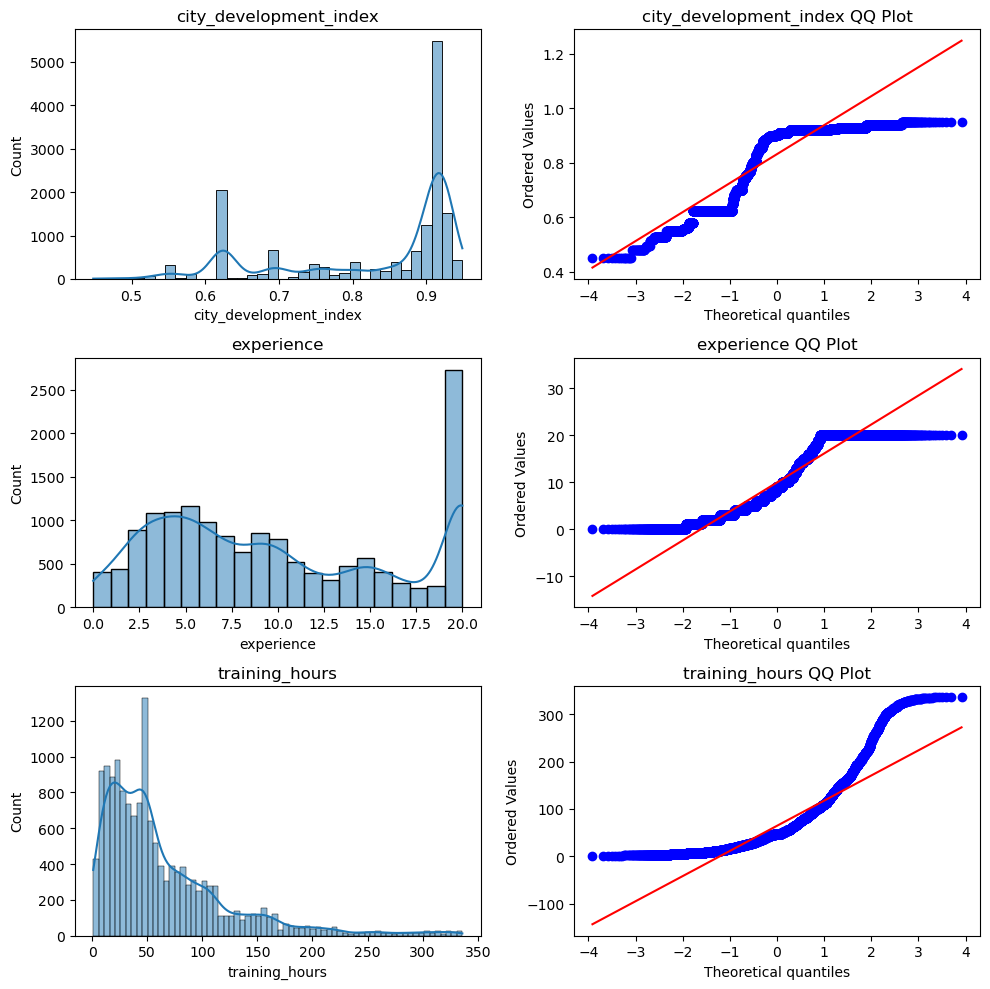

In [195]:
plt.figure(figsize=(10,10))
ax=plt.subplot(3,2,1)
sns.histplot(X_train['city_development_index'],kde=True)
plt.title('city_development_index')

ax=plt.subplot(3,2,2)
stats.probplot(X_train['city_development_index'],dist='norm',plot=plt)
plt.title('city_development_index QQ Plot')

ax=plt.subplot(3,2,3)
sns.histplot(X_train['experience'],kde=True)
plt.title('experience')

ax=plt.subplot(3,2,4)
stats.probplot(X_train['experience'],dist='norm',plot=plt)
plt.title('experience QQ Plot')

ax=plt.subplot(3,2,5)
sns.histplot(X_train['training_hours'],kde=True)
plt.title('training_hours')

ax=plt.subplot(3,2,6)
stats.probplot(X_train['training_hours'],dist='norm',plot=plt)
plt.title('training_hours QQ Plot')

plt.tight_layout()

**Now look into the score before and then after**

**Before transformation r2_score**

In [180]:
lr=LinearRegression()

lr.fit(X_train,y_train)
y_pred1=lr.predict(X_test)

print('Before appling transformation r2_score is',r2_score(y_test,y_pred1))

Before appling transformation r2_score is 0.11398295345105314


**Before transformation cross val score**

In [181]:
lr=LinearRegression()

print('Before tranformation cross val score',np.mean(cross_val_score(lr,X,y,scoring='r2')))

Before tranformation cross val score 0.11714637021593324


## Box-Cox Tranformation:

In [182]:
pt=PowerTransformer(method='box-cox')

X_train_trf=pt.fit_transform(X_train + 0.00001)
X_test_trf=pt.transform(X_test + 0.00001)

**After transformation r2_score**

In [183]:
lr=LinearRegression()

lr.fit(X_train_trf,y_train)
y_pred2=lr.predict(X_test_trf)

print('After appling appling transformation r2_score is',r2_score(y_test,y_pred2))

After appling appling transformation r2_score is 0.10091120212161875


- Before appling transformation r2_score is 0.11398295345105314
- After appling appling transformation r2_score is 0.10091120212161875


In [184]:
lr=LinearRegression()
print('After tranformation cross val score',np.mean(cross_val_score(lr,X_train_trf,y_train,scoring='r2')))

After tranformation cross val score 0.09939745416115311


- Before appling Box_cox transformation r2_score is 0.11398295345105314
- After appling appling Box_cox transformation r2_score is 0.10091120212161875

- Before Box_cox tranformation cross val score 0.11714637021593324
- After Box_cox tranformation cross val score 0.09939745416115311

In [185]:
X_train_trnsf=pd.DataFrame(X_train_trf)

In [186]:
X_train_trnsf

,0,1,2
0,0.645970,-1.332123,-1.041581
1,0.436533,-0.409854,2.155754
2,0.645970,-1.045003,-0.670278
3,0.645970,-1.045003,-0.299919
4,0.531245,-0.805917,-0.087143
...,...,...,...
15321,0.818044,1.318406,-0.631393
15322,-0.003065,-0.805917,1.118772
15323,0.375201,0.207873,0.217094
15324,-1.567788,-0.597191,-1.041581


**Before and After Box_cox transform distplot**

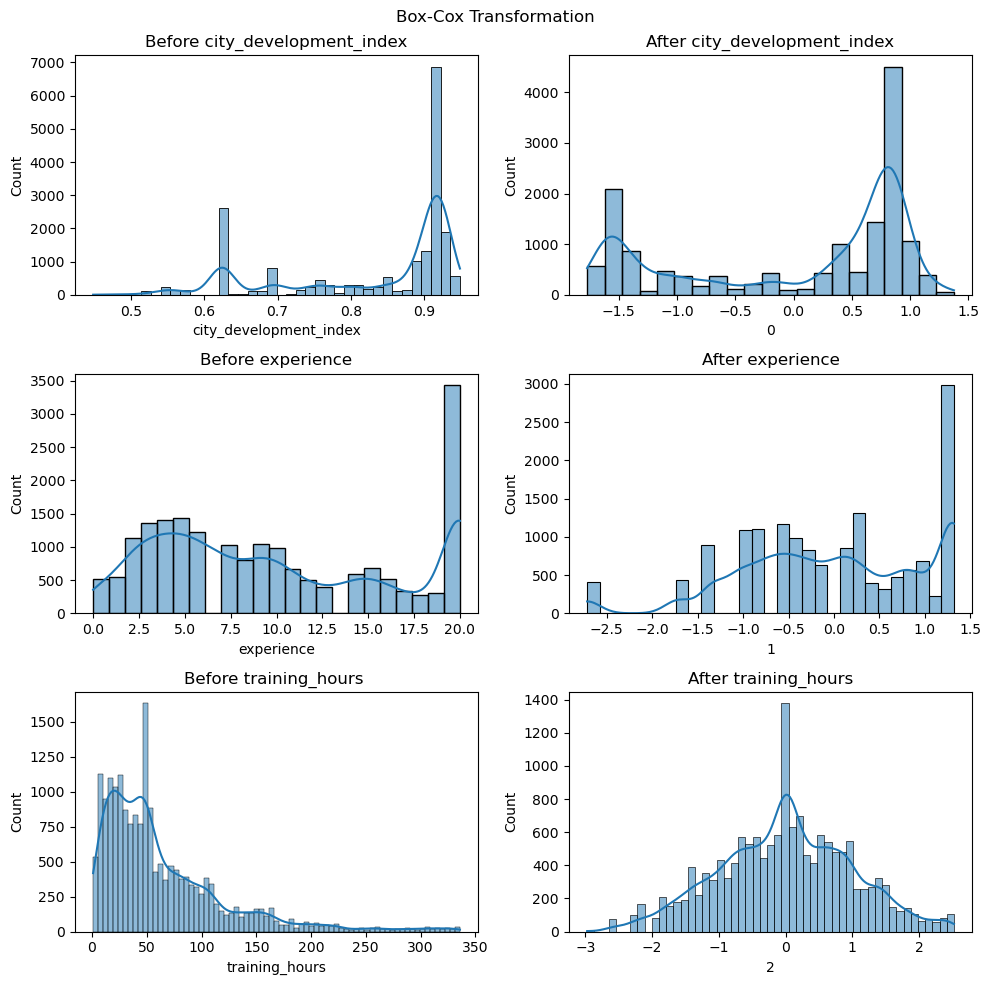

In [199]:
plt.figure(figsize=(10,10))

ax=plt.subplot(3,2,1)
sns.histplot(df['city_development_index'],kde=True)
plt.title('Before city_development_index')


ax=plt.subplot(3,2,2)
sns.histplot(X_train_trnsf[0],kde=True)
plt.title('After city_development_index')

ax=plt.subplot(3,2,3)
sns.histplot(df['experience'],kde=True)
plt.title('Before experience')

ax=plt.subplot(3,2,4)
sns.histplot(X_train_trnsf[1],kde=True)
plt.title('After experience')

ax=plt.subplot(3,2,5)
sns.histplot(df['training_hours'],kde=True)
plt.title('Before training_hours ')


ax=plt.subplot(3,2,6)
sns.histplot(X_train_trnsf[2],kde=True)
plt.title('After training_hours')

plt.suptitle("Box-Cox Transformation")

plt.tight_layout()

**Before and After QQ plot**

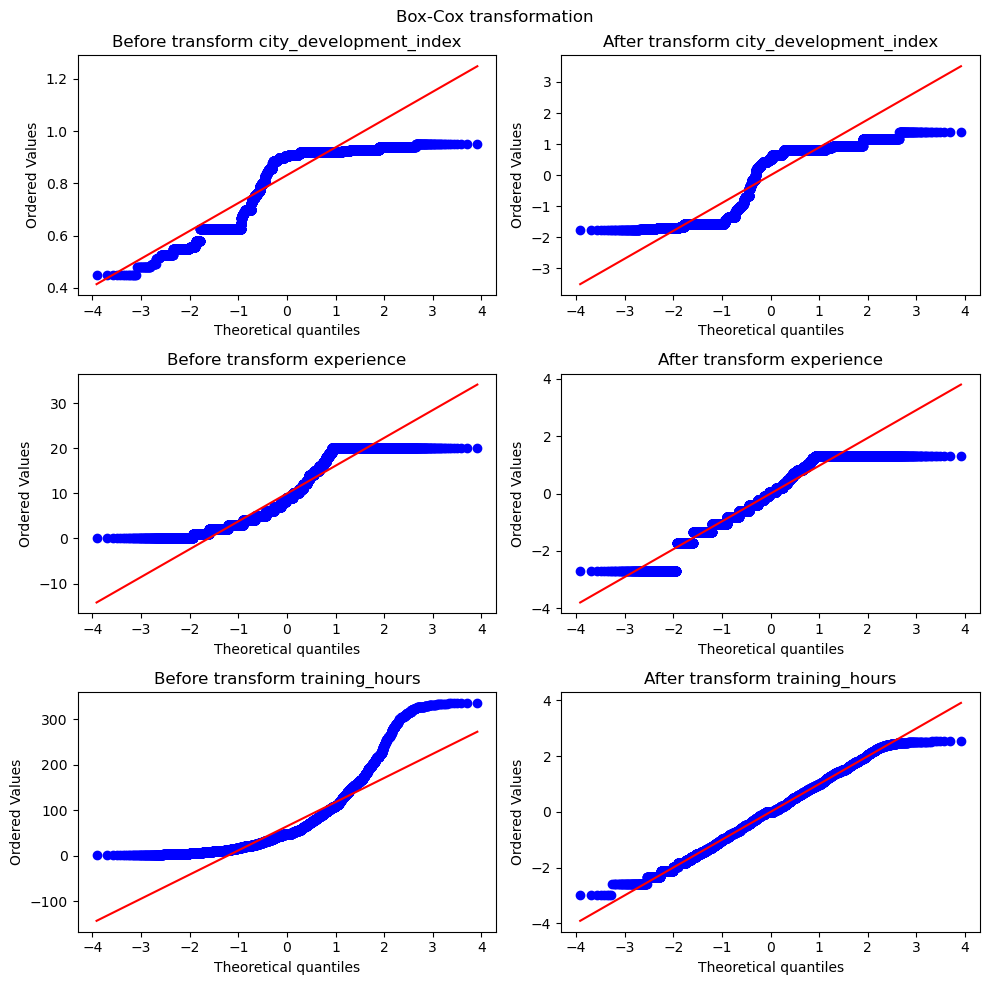

In [200]:
plt.figure(figsize=(10,10))

ax=plt.subplot(3,2,1)
stats.probplot(X_train['city_development_index'],dist='norm',plot=plt)
plt.title('Before transform city_development_index')

ax=plt.subplot(3,2,2)
stats.probplot(X_train_trnsf[0],dist='norm',plot=plt)
plt.title('After transform city_development_index')

ax=plt.subplot(3,2,3)
stats.probplot(X_train['experience'],dist='norm',plot=plt)
plt.title('Before transform experience')

ax=plt.subplot(3,2,4)
stats.probplot(X_train_trnsf[1],dist='norm',plot=plt)
plt.title('After transform experience')

ax=plt.subplot(3,2,5)
stats.probplot(X_train['training_hours'],dist='norm',plot=plt)
plt.title('Before transform training_hours')

ax=plt.subplot(3,2,6)
stats.probplot(X_train_trnsf[2],dist='norm',plot=plt)
plt.title('After transform training_hours')


plt.suptitle('Box-Cox transformation')

plt.tight_layout()

## Yeo-Johnson transformation

In [189]:
pt=PowerTransformer(method='yeo-johnson')

X_train_trf1=pt.fit_transform(X_train)
X_test_trf1=pt.transform(X_test)

**After transformation r2_score**

In [190]:
lr=LinearRegression()

lr.fit(X_train_trf1,y_train)
y_pred1=lr.predict(X_test_trf1)

print('After appling appling transformation r2_score is',r2_score(y_test,y_pred1))

After appling appling transformation r2_score is 0.09887602543943375


**After transformation cross val score**

In [191]:
lr=LinearRegression()
print('After tranformation cross val score',np.mean(cross_val_score(lr,X_train_trf1,y_train,scoring='r2')))

After tranformation cross val score 0.09759320072650306


- Before appling yeo-johnson transformation r2_score is 0.11398295345105314
- After appling yeo-johnson appling transformation r2_score is 0.09887602543943375

- Before yeo-johnson tranformation cross val score 0.11714637021593324
- After yeo-johnson tranformation cross val score 0.09759320072650306

In [192]:
X_train_trnsf1=pd.DataFrame(X_train_trf1)

**Before and After yeo-johnson transformation distribution plot**

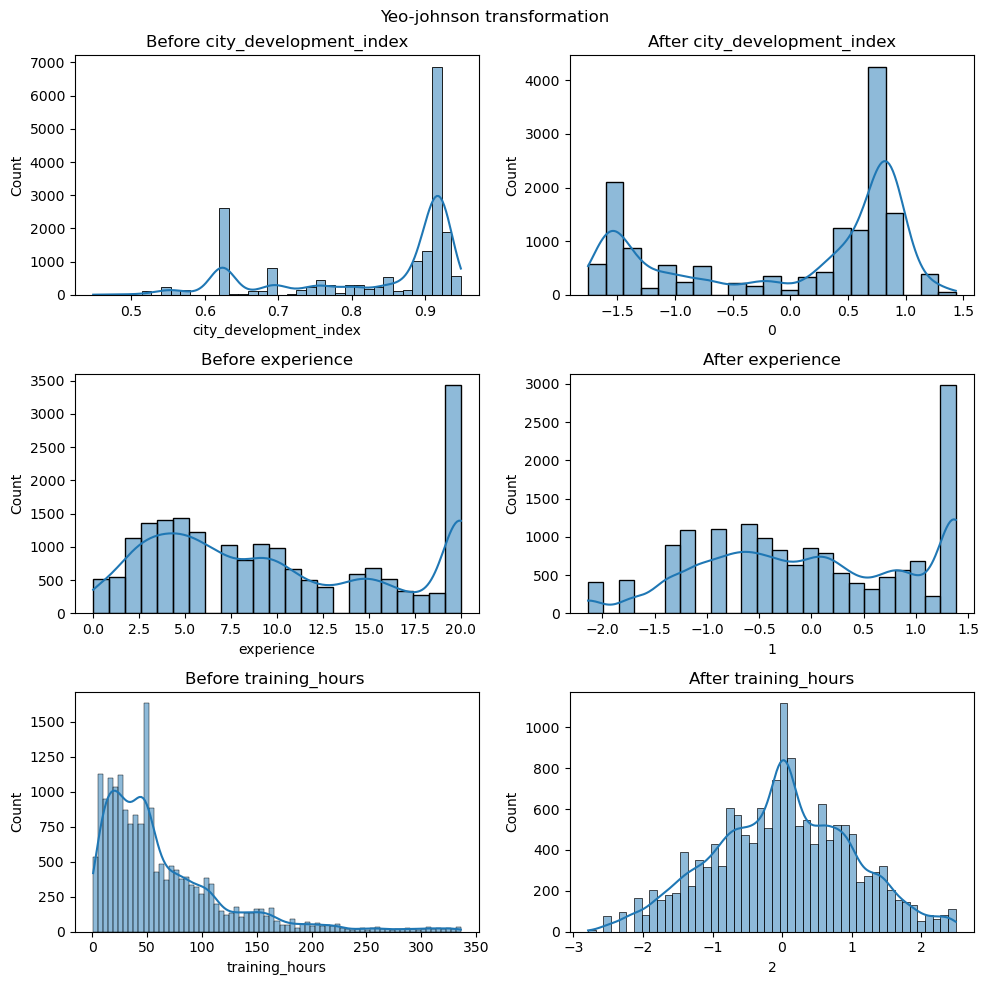

In [201]:
plt.figure(figsize=(10,10))

ax=plt.subplot(3,2,1)
sns.histplot(df['city_development_index'],kde=True)
plt.title('Before city_development_index')


ax=plt.subplot(3,2,2)
sns.histplot(X_train_trnsf1[0],kde=True)
plt.title('After city_development_index')

ax=plt.subplot(3,2,3)
sns.histplot(df['experience'],kde=True)
plt.title('Before experience')

ax=plt.subplot(3,2,4)
sns.histplot(X_train_trnsf1[1],kde=True)
plt.title('After experience')

ax=plt.subplot(3,2,5)
sns.histplot(df['training_hours'],kde=True)
plt.title('Before training_hours ')


ax=plt.subplot(3,2,6)
sns.histplot(X_train_trnsf1[2],kde=True)
plt.title('After training_hours')

plt.suptitle('Yeo-johnson transformation')

plt.tight_layout()

**Before and After yeo-johnson transformation QQ plot**

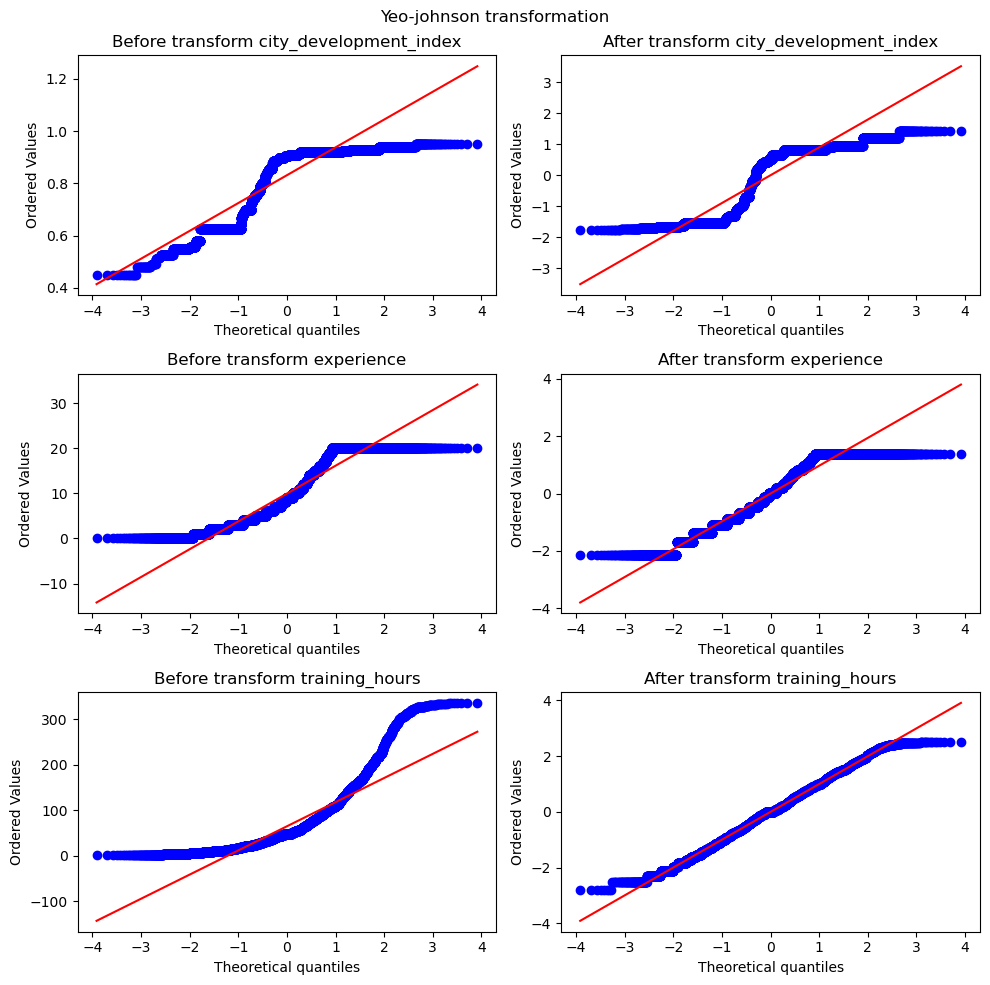

In [202]:
plt.figure(figsize=(10,10))

ax=plt.subplot(3,2,1)
stats.probplot(X_train['city_development_index'],dist='norm',plot=plt)
plt.title('Before transform city_development_index')

ax=plt.subplot(3,2,2)
stats.probplot(X_train_trnsf1[0],dist='norm',plot=plt)
plt.title('After transform city_development_index')

ax=plt.subplot(3,2,3)
stats.probplot(X_train['experience'],dist='norm',plot=plt)
plt.title('Before transform experience')

ax=plt.subplot(3,2,4)
stats.probplot(X_train_trnsf1[1],dist='norm',plot=plt)
plt.title('After transform experience')

ax=plt.subplot(3,2,5)
stats.probplot(X_train['training_hours'],dist='norm',plot=plt)
plt.title('Before transform training_hours')

ax=plt.subplot(3,2,6)
stats.probplot(X_train_trnsf1[2],dist='norm',plot=plt)
plt.title('After transform training_hours')

plt.suptitle('Yeo-johnson transformation')
plt.tight_layout()

**Thanks**